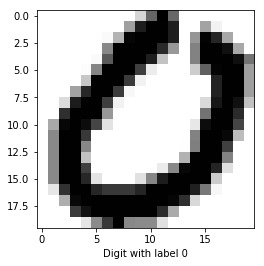

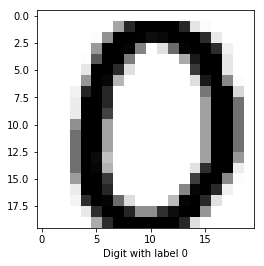

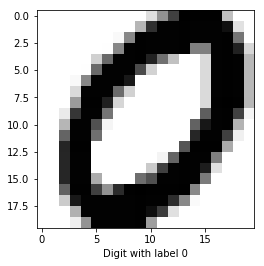

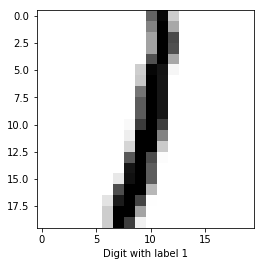

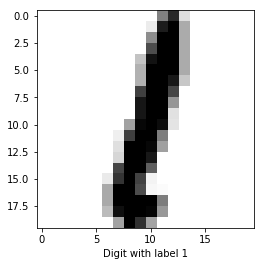

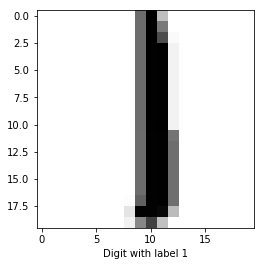

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the training dataset
train_features = np.load("train_features.npy")
train_labels = np.load("train_labels.npy").astype("int8")

n_train = train_labels.shape[0]

def visualize_digit(features, label):
    # Digits are stored as a vector of 400 pixel values. Here we
    # reshape it to a 20x20 image so we can display it.
    plt.imshow(features.reshape(20, 20), cmap="binary")
    plt.xlabel("Digit with label " + str(label))
    plt.show()

# Visualize a digit
# visualize_digit(train_features[0,:], train_labels[0])

# TODO: Plot three images with label 0 and three images with label 1

def images(a):
    counter = 0
    for i in range(20):
        if train_labels[i] == a:
            counter += 1
            visualize_digit(train_features[i,:], train_labels[i])
        if  counter==3:
            break
images(0)
images(1) 

In [4]:
# Linear regression
from numpy.linalg import inv

# TODO: Solve the linear regression problem, regressing
# X = train_features against y = 2 * train_labels - 1

X = train_features
y = 2 * train_labels - 1

def get_w(X, y):
    XT = X.transpose()
    w = np.dot(inv(XT @ X) @ XT, y)
    return(w)

w = get_w(X, y)
res = np.dot(X, w) - y
res_2 = np.dot(res.transpose(), res)
# TODO: Report the residual error and the weight vector

print('the residual error is {} \n'.format(res_2))
print('w is a 400*1 vector: w = ')
print(w)

the residual error is 422.75079345703125 

w is a 400*1 vector: w = 
[ -3.30796123e-01   3.91724765e-01   1.48155391e-01  -1.60603136e-01
   1.03279680e-01  -1.96949169e-02  -1.27705634e-01   9.45962034e-03
  -1.71494633e-02  -5.67550585e-03  -4.69030812e-03  -1.12644807e-02
  -5.71013801e-03   4.59017232e-03   1.78760011e-02  -3.00972313e-02
   1.00369528e-02  -6.45812601e-02  -2.30415799e-02  -2.63008233e-02
  -1.63458556e-01   4.67080057e-01  -2.82919407e-03  -1.05642147e-01
  -1.80704594e-01   1.34412199e-01  -5.09417057e-03  -3.07268575e-02
  -6.59221411e-02   1.76010150e-02  -3.06512788e-02  -6.22963160e-03
   1.54067874e-02  -3.13660577e-02  -2.52744369e-03  -6.17406890e-03
  -1.02588534e-03   5.19412048e-02   3.95637155e-02   6.29596263e-02
  -3.88406903e-01  -2.16920286e-01  -9.80447531e-02   1.68329507e-01
  -5.70877790e-02   1.50778815e-02   2.43577361e-03   2.72967089e-02
   6.30412847e-02  -2.69233901e-02   7.73133337e-03  -1.71149727e-02
  -5.02606295e-02   8.06276128e-03

In [5]:
# Load the test dataset
# It is good practice to do this after the training has been
# completed to make sure that no training happens on the test
# set!

from numpy import logical_xor, logical_not
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy").astype("int8")

n_test = test_labels.shape[0]

# TODO: Implement the classification rule and evaluate it
# on the training and test set

def correct_rate(features, labels, n, w, rule):
    predict = (np.dot(features, w) > rule)
    correct = logical_not(logical_xor(predict, labels))
    return float(sum(correct))/n


print('the correct pertentage by this model in the training \n \
        set is {} \n'.format(correct_rate(train_features, train_labels, n_train, w, 0)))

print('the correct pertentage by this model in the test \n \
        set is {} \n'.format(correct_rate(test_features, test_labels, n_test, w, 0)))

the correct pertentage by this model in the training 
         set is 0.9975909833949926 

the correct pertentage by this model in the test 
         set is 0.9981087470449173 



In [6]:
# TODO: Try regressing against a vector with 0 for class 0
# and 1 for class 1

w2 = get_w(X, train_labels)
print('0 for 0, 1 for 1 model: the correct pertentage by this model in the training \n \
        set is {} \n'.format(correct_rate(train_features, train_labels, n_train, w2, 0.5)))

print('0 for 0, 1 for 1 model: the correct pertentage by this model in the test \n \
        set is {} \n'.format(correct_rate(test_features, test_labels, n_test, w2, 0.5)))

0 for 0, 1 for 1 model: the correct pertentage by this model in the training 
         set is 0.9896756431213972 

0 for 0, 1 for 1 model: the correct pertentage by this model in the test 
         set is 0.9914893617021276 



In [7]:
# TODO: Form a new feature matrix with a column of ones added
# and do both regressions with that matrix

train_features_1 = np.hstack((train_features, np.ones((n_train, 1))))
test_features_1 = np.hstack((test_features, np.ones((n_test, 1))))

w3 = get_w(train_features_1, 2*train_labels-1)
print('train with bias column: the correct pertentage by this model in the training \n \
        set is {} \n'.format(correct_rate(train_features_1, train_labels, n_train, w3, 0)))

print('train with bias column: the correct pertentage by this model in the test \n \
        set is {} \n'.format(correct_rate(test_features_1, test_labels, n_test, w3, 0)))


w4 = get_w(train_features_1, train_labels)
print('train with bias column & 0 for 0 1 for 1: the correct pertentage by this model in the training \n \
        set is {} \n'.format(correct_rate(train_features_1, train_labels, n_train, w4, 0.5)))

print('train with bias column & 0 for 0 1 for 1: the correct pertentage by this model in the test \n \
        set is {} \n'.format(correct_rate(test_features_1, test_labels, n_test, w4, 0.5)))


train with bias column: the correct pertentage by this model in the training 
         set is 0.9941495311021251 

train with bias column: the correct pertentage by this model in the test 
         set is 0.9962174940898345 

train with bias column & 0 for 0 1 for 1: the correct pertentage by this model in the training 
         set is 0.9941495311021251 

train with bias column & 0 for 0 1 for 1: the correct pertentage by this model in the test 
         set is 0.9962174940898345 



In [8]:
# Logistic Regression

# You can also compare against how well logistic regression is doing.
# We will learn more about logistic regression later in the course.

import sklearn.linear_model

lr = sklearn.linear_model.LogisticRegression()
lr.fit(X, train_labels)

test_error_lr = 1.0 * sum(lr.predict(test_features) != test_labels) / n_test
print(1-test_error_lr)

0.999527186761
